In [7]:
import random 
 
def randomSolution(tsp): 
    cities = list(range(len(tsp))) 
    solution = [] 
 
    for i in range(len(tsp)): 
        randomCity = cities[random.randint(0, len(cities) - 1)] 
        solution.append(randomCity) 
        cities.remove(randomCity) 
 
    return solution 
 
def routeLength(tsp, solution): 
    routeLength = 0 
    for i in range(len(solution)): 
        routeLength += tsp[solution[i - 1]][solution[i]] 
    return routeLength 
 
def getNeighbours(solution): 
    neighbours = [] 
    for i in range(len(solution)): 
        for j in range(i + 1, len(solution)): 
            neighbour = solution.copy() 
            neighbour[i] = solution[j] 
            neighbour[j] = solution[i] 
            neighbours.append(neighbour) 
    return neighbours 
 
def getBestNeighbour(tsp, neighbours): 
    bestRouteLength = routeLength(tsp, neighbours[0]) 
    bestNeighbour = neighbours[0] 
    for neighbour in neighbours: 
        currentRouteLength = routeLength(tsp, neighbour) 
        if currentRouteLength < bestRouteLength: 
            bestRouteLength = currentRouteLength 
            bestNeighbour = neighbour 
    return bestNeighbour, bestRouteLength 
 
def hillClimbing(tsp): 
    currentSolution = randomSolution(tsp) 
    currentRouteLength = routeLength(tsp, currentSolution) 
    neighbours = getNeighbours(currentSolution) 
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours) 
 
    while bestNeighbourRouteLength < currentRouteLength: 
        currentSolution = bestNeighbour 
        currentRouteLength = bestNeighbourRouteLength 
        neighbours = getNeighbours(currentSolution) 
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours) 
 
    return currentSolution, currentRouteLength 
 
def main():
    tsp = [[0, 400, 500, 300], 
          [400, 0, 300, 500], 
          [500, 300, 0, 400], 
          [300, 500, 400, 0]] 
    print(hillClimbing(tsp))

 
if __name__ == "__main__": 
    main()

([1, 0, 3, 2], 1400)


In [12]:
from numpy import asarray 
from numpy import exp 
from numpy.random import randn 
from numpy.random import rand 
from numpy.random import seed 
  
def objective(x): 
    return x[0]**2.0 
  
def simulated_annealing(objective, bounds, n_iterations, step_size, temp): 
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0]) 
    best_eval = objective(best) 
    curr, curr_eval = best, best_eval 
    for i in range(n_iterations): 
        candidate = curr + randn(len(bounds)) * step_size 
        candidate_eval = objective(candidate) 
        if candidate_eval < best_eval: 
            best, best_eval = candidate, candidate_eval 
            print('>%d f(%s) = %.5f' % (i, best, best_eval)) 
        print('>%d f(%s) = %.5f' % (i, candidate, candidate_eval)) 
        diff = candidate_eval - curr_eval 
        t = temp / float(i + 1) 
        metropolis = exp(-diff / t) 
        if diff < 0 or rand() < metropolis: 
            curr, curr_eval = candidate, candidate_eval 
    return [best, best_eval] 
  
seed(1) 
bounds = asarray([[-5.0, 5.0]]) 
n_iterations = 1000 
step_size = 0.1 
temp = 10 
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp) 
print('Done!') 
print('f(%s) = %f' % (best, score))

>0 f([-0.90999724]) = 0.82809
>1 f([-0.95488502]) = 0.91181
>2 f([-1.06547853]) = 1.13524
>3 f([-1.23093007]) = 1.51519
>4 f([-1.33263148]) = 1.77591
>5 f([-1.16719389]) = 1.36234
>6 f([-1.0209831]) = 1.04241
>7 f([-1.22699717]) = 1.50552
>8 f([-1.17056268]) = 1.37022
>9 f([-1.2272137]) = 1.50605
>10 f([-1.05718574]) = 1.11764
>11 f([-1.16717486]) = 1.36230
>12 f([-1.00380464]) = 1.00762
>13 f([-1.01300197]) = 1.02617
>14 f([-1.12306389]) = 1.26127
>15 f([-1.00859152]) = 1.01726
>16 f([-1.09359676]) = 1.19595
>17 f([-0.91250952]) = 0.83267
>18 f([-0.92479854]) = 0.85525
>19 f([-1.01837549]) = 1.03709
>20 f([-1.08754156]) = 1.18275
>21 f([-1.12721691]) = 1.27062
>22 f([-1.19593418]) = 1.43026
>23 f([-1.28045475]) = 1.63956
>24 f([-1.39218578]) = 1.93818
>25 f([-1.25701318]) = 1.58008
>26 f([-1.3180117]) = 1.73715
>27 f([-1.28737047]) = 1.65732
>28 f([-1.3620863]) = 1.85528
>29 f([-1.19284084]) = 1.42287
>30 f([-0.98863796]) = 0.97741
>31 f([-0.94388589]) = 0.89092
>32 f([-0.87554747]) =

In [18]:
#GENETICS ALGORITHM RAW
import numpy

# Kita ingin memaksimalkan:
# y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6
equation_inputs = numpy.array([4, -2, 3.5, 5, -11, -4.7])
num_weights = len(equation_inputs)

# Inisialisasi populasi (8 solusi awal × 6 bobot)
sol_per_pop = 8
num_parents_mating = 4
pop_size = (sol_per_pop, num_weights)
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print("Initial Population:\n", new_population)

# Fungsi-fungsi dasar GA

#Hitung fitness (semakin besar nilai y, semakin baik)
def cal_pop_fitness(equation_inputs, pop):
    return numpy.sum(pop * equation_inputs, axis=1)

# Pilih individu terbaik sebagai parent
def select_mating_pool(pop, fitness, num_parents):
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999  # tandai agar tidak dipilih lagi
    return parents

#Crossover (kawin silang dua parent)
def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    crossover_point = numpy.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

#Mutasi kecil untuk variasi
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        random_index = numpy.random.randint(0, offspring_crossover.shape[1])
        random_value = numpy.random.uniform(-1.0, 1.0)
        offspring_crossover[idx, random_index] += random_value
    return offspring_crossover

#Jalankan proses evolusi 
num_generations = 5
for generation in range(num_generations):
    print("\nGeneration:", generation + 1)

    # Hitung fitness populasi
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Pilih parent terbaik
    parents = select_mating_pool(new_population.copy(), fitness.copy(), num_parents_mating)

    # Buat offspring dari parent
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Lakukan mutasi
    offspring_mutation = mutation(offspring_crossover)

    # Gabungkan kembali populasi baru
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # Tampilkan hasil terbaik per generasi
    best_output = numpy.max(numpy.sum(new_population * equation_inputs, axis=1))
    print("Best result:", best_output)

# --- Hasil akhir ---
fitness = cal_pop_fitness(equation_inputs, new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))
print("\nBest solution:", new_population[best_match_idx, :])
print("Best solution fitness:", fitness[best_match_idx])


Initial Population:
 [[-3.09935419  2.84655255  3.42966315  0.44859789 -2.38109739 -2.72198559]
 [-0.92738549  3.80320564  0.02391528  0.73160063  0.07122045 -1.81711191]
 [ 1.24271024  0.12738968  0.96483503 -2.13931634  0.73375539 -1.23886109]
 [-2.97002445 -1.58261267  1.97724512 -3.07783655 -2.88147995 -1.32923188]
 [-2.29460858  2.39399603 -0.92047495  2.14766248  0.94803626 -0.06525535]
 [-3.34902939  3.85387475 -2.05349243  3.84812644 -3.8056615  -2.41428599]
 [ 3.72720403  1.59605326 -2.08331207 -1.72678556  1.96190472 -1.91585026]
 [ 1.04756486 -2.12715599  3.83084286 -3.06243908 -0.02094277  3.2957418 ]]

Generation: 1
Best result: 58.94353512771527

Generation: 2
Best result: 71.60829992916433

Generation: 3
Best result: 71.60829992916433

Generation: 4
Best result: 81.8496655496551

Generation: 5
Best result: 81.8496655496551

Best solution: [[[-2.16326705 -1.58261267  1.97724512  3.84812644 -4.5299431
   -2.41428599]]]
Best solution fitness: [81.84966555]


Best solution :  [ 9.35334286 -5.57654494  3.99040535  6.35754017 -6.26967194 -7.92892953]
Best fitness  :  200.55294096518367
Predicted output (y):  200.55294096518367


C:\Users\User\anaconda3\envs\myenv_gpu\lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


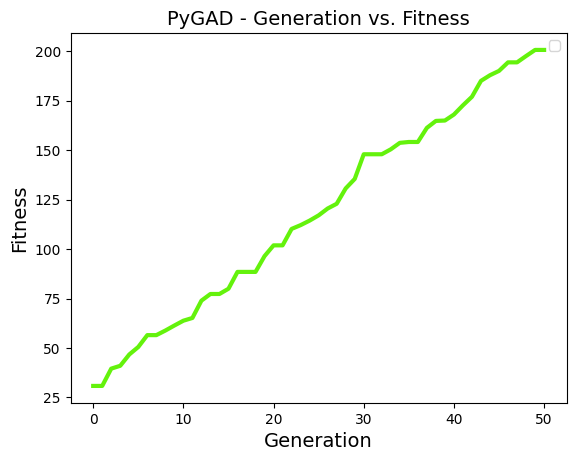

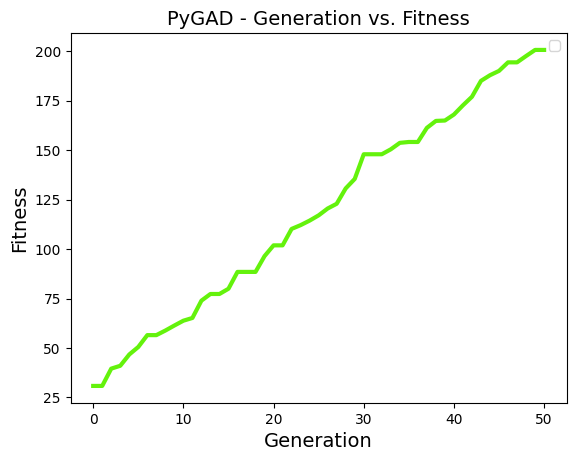

In [17]:
# GENETICS ALGORITHM 
import numpy 
import pygad
# The y=target is to maximize this equation ASAP: 
# y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6 
# where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) 
# What are the best values for the 6 weights w1 to w6? 
# We are going to use the genetic algorithm for the best possible values after a number of generations. 
equation_inputs = [4,-2,3.5,5,-11,-4.7] 
num_weights = 6 
# Genetic algorithm parameters: 
# Mating pool size 
# Population size 

def cal_pop_fitness(equation_inputs, pop):
    return numpy.sum(pop * equation_inputs, axis=1)

ga_instance = pygad.GA(
    num_generations=50,         # jumlah generasi
    num_parents_mating=4,       # jumlah parent untuk kawin
    fitness_func=fitness_func,  # fungsi fitness
    sol_per_pop=8,              # jumlah individu dalam populasi
    num_genes=num_weights,      # jumlah gen (w1–w6)
    init_range_low=-4,          # batas bawah nilai awal gen
    init_range_high=4,          # batas atas nilai awal gen
    mutation_percent_genes=10,  # persentase gen yang dimutasi
    mutation_type="random",     # tipe mutasi
    crossover_type="single_point" # tipe crossover
)

ga_instance.run()

# Menampilkan hasil terbaik
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best solution : ", solution)
print("Best fitness  : ", solution_fitness)

# Verifikasi nilai fungsi untuk solusi terbaik
predicted_y = numpy.sum(numpy.array(equation_inputs) * solution)
print("Predicted output (y): ", predicted_y)

# Visualisasi konvergensi
ga_instance.plot_fitness()